
# Part I: Defining the Data Problem 


### Data Question:

Since 2020 the use of telemedicine has skyrocketed and continues to be a key method for healthcare delivery. It has become a subject of interest to the broader healthcare industry, as evidenced by increased investments from healthcare companies as well as federal and state governments. For example, the Biden administration recently announced it will invest over 770 million for “telemedicine pods” in rural areas across the U.S. - 746,000 of this will be used for TN counties. A state task force dedicated to rural health outcomes recommended an additional 66,900 should be earmarked for expanding telemedicine capabilities in rural communities.

The potential applications for telemedicine are broad and emergent. Many doctors and therapists now offer live video calls for routine issues like medication management, mental health services, or follow-up care after a hospital stay. Other applications of telehealth, such as remote patient monitoring and mobile health applications, showcase the potential of telehealth to radically transform the healthcare landscape. In particular, there is much opportunity in rural applications of telehealth to address lack of accessibility.

According to the TN Rural Health Care Task Force, rural residents are at particular risk for “poor health outcomes, including mental health challenges, obesity, and substance misuse”. **``How can telehealth be used to target these health issues in specific rural counties?``**

Many factors can play a role in health outcomes. The TN Department of Health has a webpage that outlines many contributing factors to poor health outcomes in rural populations.  Any of these could be explored in the context of this analysis: 
 - average proximity to hospitals
  - food scarcity 
  - physical activeness trends 
  - internet or broadband access
  - health and nutrition literacy
  - social isolation levels
  - socioeconomic status by county

Policy may also play a role. Many rural populations rely on medicaid or medicare for health care. A 2020 report outlines state medicaid policies as one of the challenges in using telehealth to address opioid addiction. The report includes a state readiness assessment for implementing telehealth delivery methods. An assessment of TN’s readiness reveals a few gaps in coverage. For example, the CCHP (Center for Connected Health Policy) has a helpful policy map comparison that shows TN is behind other states in allowing medicaid reimbursement for remote patient monitoring as well as “Store and Forward” medical diagnostic processing. 


### Data Sources:

##### 1. [Medicare Telehealth Trends](https://catalog.data.gov/dataset/medicare-telemedicine-snapshot) (medicare_trends_df)

The Medicare Telehealth Trends dataset provides information about people with Medicare who used telehealth services between January 1, 2020 and September 30, 2023. 

The data was also used to generate the [Medicare Telehealth Trends Report](https://data.cms.gov/sites/default/files/2024-03/Medicare%20Telehealth%20Trends%20Snapshot%2020240307_508.pdf).

[Data Dictionary](https://data.cms.gov/sites/default/files/2023-05/c22a72d5-1b0c-47db-9d19-5fa75df96f4e/Medicare%20Telehealth%20Trends%20Report%20Data%20Dictionary_20220906_508.pdf) 

##### 2. [Medicaid & Chip Telehealth Trends](https://data.medicaid.gov/dataset/651fa253-4dd4-4867-8725-2b5ae1dd5ce9?conditions[0][property]=state&conditions[0][value]=Tennessee&conditions[0][operator]=%3D&conditions[1][property]=dataquality&conditions[1][value]=DQ&conditions[1][operator]=%3C%3E#data-table) (medicaid_trends_df)

This data set includes monthly counts and rates (per 1,000 beneficiaries) of services provided via telehealth, including live audio video, remote patient monitoring, store and forward, and other telehealth, to Medicaid and CHIP beneficiaries, by state. 

Note: Some states have serious data quality issues for one or more months, making the data unusable for calculating telehealth services measures...Cells with a value of “DQ” (in the DataQuality column). indicate that data were suppressed due to unusable data. Additionally, some cells have a value of “DS”. This indicates that data were suppressed for confidentiality reasons because the group included fewer than 11 beneficiaries.

There is no data dictionary for this data set

##### 3. [County Health Rankings and Roadmaps - TN](https://www.countyhealthrankings.org/health-data/tennessee?year=2024&measure=Mental+Health+Providers) (CHHR_df)

County Health Rankings & Roadmaps (CHR&R), a program of the University of Wisconsin Population Health Institute, draws attention to why there are differences in health within and across communities...CHR&R provides a snapshot of the health of nearly every county in the nation...

What Impacts Health? - See the [CHRR Health Model](https://www.countyhealthrankings.org/what-impacts-health/county-health-rankings-model)

##### 4. [American Community Survey](https://www.census.gov/data/developers/data-sets/acs-5year.2022.html#list-tab-1806015614) (ACS_df)

May need to use an API call here


# Part II: Data Import & Cleaning


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Medicare Data

In [2]:
#Read in csv for medicare telehealth trends
medicare_trends_df = pd.read_csv('capstone_data/Medicare/US_medicare_telehealth_data_2020_to_2023.csv')
medicare_trends_df.head()

,Year,quarter,Bene_Geo_Desc,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Bene_Age_Desc,Bene_RUCA_Desc,Total_Bene_TH_Elig,Total_PartB_Enrl,Total_Bene_Telehealth,Pct_Telehealth
0,2020,Overall,National,All,All,All,All,All,All,30946785.0,3.224489e+07,14826919.0,0.4791
1,2020,Overall,National,All,All,All,All,All,Rural,7179538.0,7.490301e+06,2858284.0,0.3981
2,2020,Overall,National,All,All,All,All,All,Urban,23696871.0,2.462914e+07,11944230.0,0.5040
3,2020,Overall,National,All,All,All,All,All,Unknown,NaN,NaN,NaN,NaN
4,2020,Overall,National,All,All,All,All,0-64,All,4088345.0,4.291403e+06,2322324.0,0.5680


In [3]:
#Renamed some of the columns based on their definitions so I can remember what they mean while I'm working with them
medicare_trends_df = medicare_trends_df.rename(columns={"Total_Bene_TH_Elig": "nunique_eligible_for_telehealth", "Total_PartB_Enrl": "total_enrollees_Part_B", 'Total_Bene_Telehealth':'nunique_users_of_telehealth', 'Pct_Telehealth':'pct_actual_users_out_of_eligible_users'})

#Multiply the pct column by 100 and round it, for easier readibility
medicare_trends_df['pct_actual_users_out_of_eligible_users'] = round((medicare_trends_df['pct_actual_users_out_of_eligible_users']*100),2)

In [4]:
#Add a new column called "year-quarter" to help break out changes by quarter per year
medicare_trends_df['year-quarter'] = medicare_trends_df['Year'].astype(str) + "-" + medicare_trends_df['quarter'].astype(str) 
medicare_trends_df.head()

,Year,quarter,Bene_Geo_Desc,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Bene_Age_Desc,Bene_RUCA_Desc,nunique_eligible_for_telehealth,total_enrollees_Part_B,nunique_users_of_telehealth,pct_actual_users_out_of_eligible_users,year-quarter
0,2020,Overall,National,All,All,All,All,All,All,30946785.0,3.224489e+07,14826919.0,47.91,2020-Overall
1,2020,Overall,National,All,All,All,All,All,Rural,7179538.0,7.490301e+06,2858284.0,39.81,2020-Overall
2,2020,Overall,National,All,All,All,All,All,Urban,23696871.0,2.462914e+07,11944230.0,50.40,2020-Overall
3,2020,Overall,National,All,All,All,All,All,Unknown,NaN,NaN,NaN,NaN,2020-Overall
4,2020,Overall,National,All,All,All,All,0-64,All,4088345.0,4.291403e+06,2322324.0,56.80,2020-Overall


### Medicaid & CHIP Data

In [5]:
medicaid_trends_df = pd.read_csv('capstone_data/Medicaid/US_Telehealth-Services-Provided-to-the-MedicaidCHIP-Population.csv')

In [6]:
medicaid_trends_df.head()

,State,Year,Month,TelehealthType,ServiceType,ServiceCount,RatePer1000Beneficiaries,DataQuality
0,Alabama,2018,201801,Live audio/video,All,"6,905",5.6,NaN
1,Alabama,2018,201801,Other telehealth,All,-,0,NaN
2,Alabama,2018,201801,Remote patient monitoring,All,-,0,NaN
3,Alabama,2018,201801,Store and forward,All,-,0,NaN
4,Alabama,2018,201802,Live audio/video,All,"4,821",3.9,NaN


In [7]:
#First we need to filter out "unusable" data
medicaid_trends_df = medicaid_trends_df[medicaid_trends_df['DataQuality']!='Unusable']
medicaid_trends_df = medicaid_trends_df[medicaid_trends_df['ServiceCount']!=' DS ']

In [8]:
#Then we need to change the service counts to summable data types

#Let's remove commas
medicaid_trends_df = medicaid_trends_df.replace(',','', regex=True)

#Then convert to numeric data type, coerce non-numbers to NaN
medicaid_trends_df['ServiceCount'] = medicaid_trends_df['ServiceCount'].apply(pd.to_numeric,errors='coerce')
medicaid_trends_df['RatePer1000Beneficiaries'] = medicaid_trends_df['RatePer1000Beneficiaries'].apply(pd.to_numeric,errors='coerce')
medicaid_trends_df.head()

,State,Year,Month,TelehealthType,ServiceType,ServiceCount,RatePer1000Beneficiaries,DataQuality
0,Alabama,2018,201801,Live audio/video,All,6905.0,5.6,NaN
1,Alabama,2018,201801,Other telehealth,All,NaN,0.0,NaN
2,Alabama,2018,201801,Remote patient monitoring,All,NaN,0.0,NaN
3,Alabama,2018,201801,Store and forward,All,NaN,0.0,NaN
4,Alabama,2018,201802,Live audio/video,All,4821.0,3.9,NaN


# Part III: Data Exploration

### First Look - Basic Aggregation Stats

In [9]:
#Use .describe() to get some basic aggregated stats for the data set. 
medicare_stats = round(medicare_trends_df.describe(),2)
medicaid_stats = round(medicaid_trends_df.describe(),2)

In [10]:
#Medicare Stats - telehealth benefit recipients 2020-2023:
medicare_stats.drop(['Year'], axis=1)

,nunique_eligible_for_telehealth,total_enrollees_Part_B,nunique_users_of_telehealth,pct_actual_users_out_of_eligible_users
count,19378.00,19378.00,19349.00,19347.00
mean,509782.63,644732.85,117848.05,23.24
std,2088376.79,2617578.83,544223.71,14.17
min,11.00,16.67,0.00,0.00
25%,18067.50,23625.50,3526.00,12.22
50%,80085.50,103933.00,14521.00,19.71
75%,262988.50,341424.94,51154.00,31.48
max,30946785.00,32344227.67,14826919.00,82.02


In [11]:
#Medicaid Stats - Telehealth services delivered from 2018-2022:
medicaid_stats.drop(['Year','Month','DataQuality'], axis=1)

,ServiceCount,RatePer1000Beneficiaries
count,8498.00,10158.00
mean,34938.93,17.97
std,119101.59,49.25
min,11.00,0.00
25%,72.00,0.00
50%,395.00,0.00
75%,5128.50,2.50
max,1843032.00,482.70


***Note:*** *The dates of the two datasets do not completely align. Only 2020-2022 are overlapping*

### Groupable Categories

In [22]:
service_counts_by_type = medicaid_trends_df.groupby(['TelehealthType'])['ServiceCount'].sum().reset_index(name='sum').sort_values(by='sum', ascending=False)
service_counts_by_type

,TelehealthType,sum
0,Live audio/video,292343141.0
3,Store and forward,2169924.0
1,Other telehealth,1414538.0
2,Remote patient monitoring,983408.0


### Creating Scalable Filter Functions

In order to chart some of the string variables, we need to create a way to filter them at scale

In [14]:
#For easier reference when chooseing the variables, here is a sampling of unique values in each column:
#for series_name, series in medicaid_trends_df.items():
#    print(series_name)
#    print(medicaid_trends_df[series_name].unique())
    
#Also the base dataframe info:
#medicaid_trends_df.info()

In [15]:
#Define a function that filters any df by specific value(s) in a column (the variable)
#Note: cannot filter this way using operators, more useful for str variables 
def quick_filter(df, variable, *values):
    return df[df[variable].isin(values)]

#test:
#quick_filter(medicare_trends_df,'Bene_Mdcd_Mdcr_Enrl_Stus', 'Medicare Only')

In [16]:
#List and define the str variables:
year = 'Year'
quarter = 'quarter'
state = 'Bene_Geo_Desc'
enrollment_status = 'Bene_Mdcd_Mdcr_Enrl_Stus'
race = 'Bene_Race_Desc'
sex = 'Bene_Sex_Desc'
entitlement = 'Bene_Mdcr_Entlmt_Stus'
age = 'Bene_Age_Desc'
RUCA = 'Bene_RUCA_Desc'

In [17]:
#For easier reference when chooseing the variables, here is a sampling of unique values in each column:
#for series_name, series in medicare_trends_df.items():
#    print(series_name)
#    print(medicare_trends_df[series_name].unique())
    
#Also the base dataframe info:
#medicare_trends_df.info()

In [18]:
#Define the value(s) to filter on
#For example, if we want to filter by a specific state, change this value to the state you want 
value = 'National'

#Then use the 'state' variable in the quick_filter function 
filtered_data = quick_filter(medicare_trends_df,state,value)

In [19]:
#Can optionally use this for loop to filter most variables by "All"
all_var = filtered_data
for column in filtered_data.iloc[:,3:9]:
    all_var = quick_filter(all_var,column,'All') 

filtered_data = all_var

# Part IV: Visualize the data

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'National % of Medicare Part B Teleheath Users by Year-Quarter')

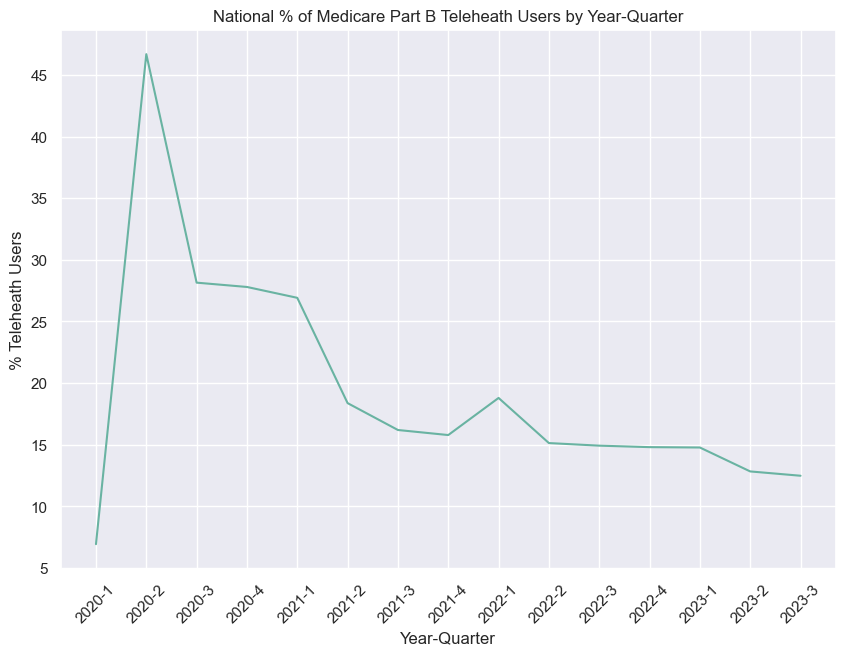

In [20]:
#Remove the 'Overall' data and look at each quarter
data_by_quarter = filtered_data[filtered_data['quarter']!='Overall']
data_by_quarter

#Plot the chart in sns
# set plot style: grey grid in the background:
sns.set_theme(style="darkgrid")


# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.lineplot(
    x="year-quarter",
    y="pct_actual_users_out_of_eligible_users",
    data=data_by_quarter, 
    color='#69b3a2');
plt.xticks(rotation=45)
plt.ylabel('% Teleheath Users')
plt.xlabel('Year-Quarter')
plt.title('National % of Medicare Part B Teleheath Users by Year-Quarter')

#Observation: Overall telehealth usage is declining year over year; why?
#Note: Go back to the variables section to filter by different states

Groupby Example:
#Count the number of times each country occurs in the data frame using a groupby
#First indicate the column to group by (country)
#Then indicate the column to perform the calculation on (also country)
#Use value counts to count number of times each category occurs in df
#reset the index to turn the result into a dataframe and name the new column 'count'
#Finally sort values to get the list in order of count descending
top_countries = gourds.groupby(['country'])['country'].value_counts().reset_index(name='count').sort_values(by='count', ascending=False)
top_countries


### Additional Challenges 
- [Overview](https://www.countyhealthrankings.org/strategies-and-solutions/what-works-for-health/strategies/telemedicine)

### Further Research: 
 - [Telehealth.HHS.gov](https://telehealth.hhs.gov/research-articles) - Additional research articles and papers on the impact and uses of telehealth, maintained by the HRSA Office for Advancement of Telehealth
  - [CHRR Strategies for Telehealth](https://www.countyhealthrankings.org/strategies-and-solutions/what-works-for-health/strategies?keywords=telemedicine&sort_by=search_api_relevance) - Strategy guides with extensive research notes and citations. Includes evidence-informed strategies to create communities where everyone can thrive.
  - [Additional CHRR Tennessee Data and Resources](https://www.countyhealthrankings.org/health-data/tennessee/data-and-resources) - These data sources provide information for communities looking for more local data. These sources provide either unique, local data; more information on demographic breakdowns (e.g., age, sex, race/ethnicity); or data for sub-county geographic units (e.g., cities, zipcodes or school districts).

